In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
tesla_df = pd.read_csv('./datasets/Tesla.csv - Tesla.csv.csv')
hyundai_df = pd.read_csv('./datasets/archive/005380.KS.csv')

In [69]:
print("Tesla Stock Prices:")
tesla_df.head(3)

Tesla Stock Prices:


,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,07/01/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800


In [71]:
print("\nHyundai Stock Prices:")
hyundai_df.head(3)


Hyundai Stock Prices:


,Date,Open,High,Low,Close,Adj Close,Volume
0,01/04/2016,147500.0,148000.0,143500.0,144000.0,117625.109375,445332
1,01/05/2016,143000.0,145000.0,142000.0,143500.0,117216.703125,530496
2,01/06/2016,144000.0,145000.0,139000.0,140000.0,114357.726562,769406


In [73]:
print("\nData Types of Tesla datasets:")
print(tesla_df.dtypes)


Data Types of Tesla datasets:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [74]:
print("\nData Types of Hyundai datasets:")
print(tesla_df.dtypes)
print(hyundai_df.dtypes)


Data Types of Hyundai datasets:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [75]:
merged_df = pd.merge(tesla_df, hyundai_df, on='Date', suffixes=('_tesla', '_hyundai'))

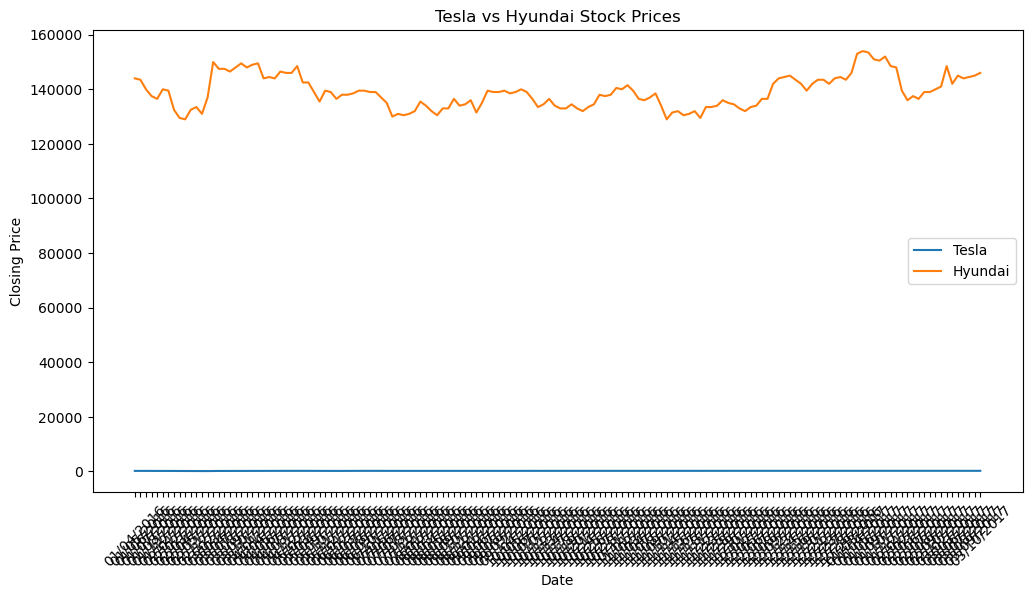

In [83]:
# Plotting Tesla stock prices

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Close_tesla'], label='Tesla')
plt.plot(merged_df['Date'], merged_df['Close_hyundai'], label='Hyundai')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla vs Hyundai Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
train_data = merged_df[['Close_tesla', 'Close_hyundai']].iloc[:-30]
test_data = merged_df[['Close_tesla', 'Close_hyundai']].iloc[-30:]

In [79]:
model = LinearRegression()
model.fit(train_data.index.values.reshape(-1, 1), train_data['Close_tesla'])

predictions = model.predict(test_data.index.values.reshape(-1, 1))

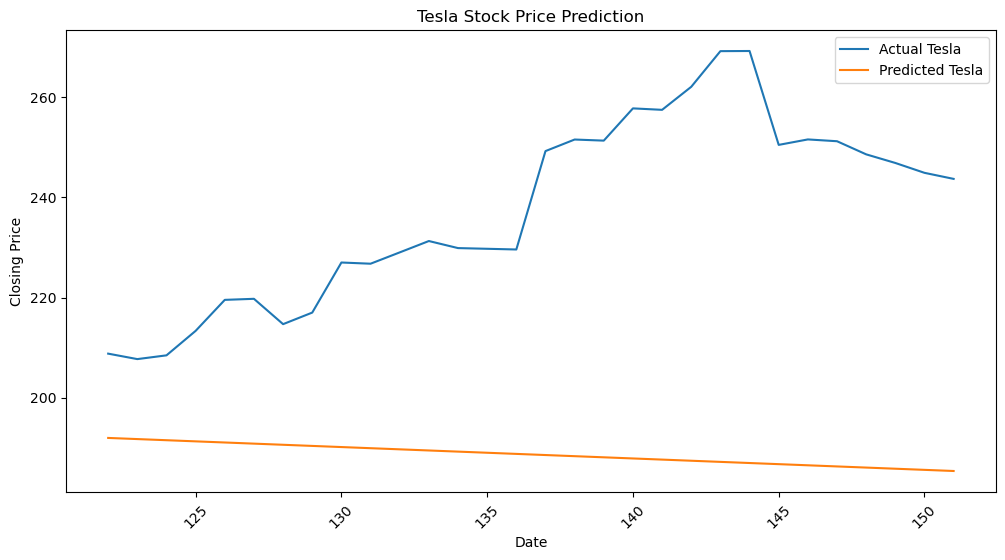

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close_tesla'], label='Actual Tesla')
plt.plot(test_data.index, predictions, label='Predicted Tesla')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()